##Library and PyPI

In [ ]:
# Install
!pip install geopandas

In [ ]:
!pip install country_converter

     |████████████████████████████████| 50 kB 2.8 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.4-py3-none-any.whl size=53543 sha256=fca06ad34cc4c80ba241053ad0d844c25b5d46f7f5a065a614412273ebad3704
  Stored in directory: /root/.cache/pip/wheels/69/cf/84/9ebca78737327440a0bb5faa6d0380e9017730534cf0dbcb8c
Successfully built country-converter


In [ ]:
# library
import numpy as np
import pandas as pd
import geopandas as geo
import matplotlib.pyplot as plt
import country_converter as coco

##Data Preprocessing

In [ ]:
# load data into the dataset
dataset = pd.read_csv("https://salaries.freshremote.work/download/salaries.csv")

In [ ]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022e,SE,FT,DevOps Engineer,144000,CAD,113201,CA,100,CA,L
1,2021,SE,FT,Security Analyst,80000,USD,80000,US,100,US,S
2,2021,EN,FT,Security Analyst,50000,USD,50000,US,100,US,S
3,2022e,EN,FT,IT DevOps Engineer,30000,USD,30000,NG,100,US,M
4,2021,SE,FT,IT Security Manager,138000,USD,138000,US,100,US,L


In [ ]:
#see what world dataset are available
geo.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

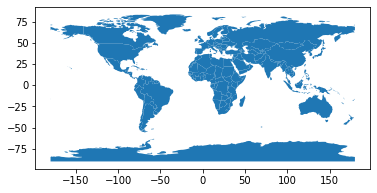

In [ ]:
# get information from world and city
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
cities = geo.read_file(geo.datasets.get_path('naturalearth_cities'))
world.plot()

In [ ]:
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
dataset.company_location

0       CA
1       US
2       US
3       US
4       US
        ..
1515    US
1516    US
1517    US
1518    US
1519    RU
Name: company_location, Length: 1520, dtype: object

In [ ]:
# We notice that the iso define in our salary dataset is different then the iso defined in world, so first we need to do merge these things together
iso = dataset.company_location
# remove duplicate and see what inside the list
iso = iso.drop_duplicates().to_list()

In [ ]:

converter = coco.CountryConverter()
iso3 = converter.convert(names = iso, src = 'ISO2', to = 'ISO3')
dataset = dataset.replace(iso, iso3)
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022e,SWE,FT,DevOps Engineer,144000,CAD,113201,CAN,100,CAN,L
1,2021,SWE,FT,Security Analyst,80000,USD,80000,USA,100,USA,S
2,2021,EN,FT,Security Analyst,50000,USD,50000,USA,100,USA,S
3,2022e,EN,FT,IT DevOps Engineer,30000,USD,30000,NGA,100,USA,M
4,2021,SWE,FT,IT Security Manager,138000,USD,138000,USA,100,USA,L


####Split by year:

In [ ]:
dataset_2021 = dataset[dataset["work_year"] == '2021']
dataset_2021.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2021,SWE,FT,Security Analyst,80000,USD,80000,USA,100,USA,S
2,2021,EN,FT,Security Analyst,50000,USD,50000,USA,100,USA,S
4,2021,SWE,FT,IT Security Manager,138000,USD,138000,USA,100,USA,L
6,2021,MI,FT,Threat Intelligence Analyst,125000,USD,125000,USA,100,USA,L
7,2021,MI,FT,Information Security Manager,128000,USD,128000,USA,100,USA,L


In [ ]:
dataset_2020 = dataset[dataset["work_year"] == '2020']
dataset_2020.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,2020,SWE,FT,DevOps Engineer,140000,USD,140000,USA,100,USA,L
26,2020,EN,FT,Cyber Security Analyst,425000,INR,5734,IND,100,IND,L
39,2020,SWE,FT,DevOps Engineer,95000,CAD,70859,CAN,50,CAN,S
46,2020,SWE,FT,DevOps Engineer,41000,GBP,52588,GBR,100,GBR,L
48,2020,MI,FT,DevOps Engineer,105000,CHF,111892,CHE,50,CHE,L


In [ ]:
dataset_2022e = dataset[dataset["work_year"] == '2022e']
dataset_2022e.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022e,SWE,FT,DevOps Engineer,144000,CAD,113201,CAN,100,CAN,L
3,2022e,EN,FT,IT DevOps Engineer,30000,USD,30000,NGA,100,USA,M
5,2022e,SWE,FT,Information Security Manager,310000,USD,310000,USA,100,USA,L
8,2022e,MI,FT,Information Security Manager,160000,USD,160000,USA,50,USA,L
16,2022e,MI,FT,Information Security Specialist,100000,AUD,71964,CAN,100,CAN,L


##Choropleth map

In [ ]:
# Cumulative numbers over countries
dataset_remote = (
    dataset.groupby(["company_location","work_year"])
    .sum()
    .reset_index()
)
display(dataset_remote)
# County IDs not in geometric data
dataset_remote_ids = dataset_remote.company_location.unique()
world_ids = world.iso_a3.unique()

# Find IDs only in one of the two county ID sets
unmatched_ids = np.setxor1d(dataset_remote_ids, world_ids)
print(f"Country IDs with non-matching IDs: \n{unmatched_ids}")
print(
    f"Countries with non-matching IDS: \n{dataset_remote [dataset_remote.company_location.isin(unmatched_ids)].company_location.unique()}"
)


,company_location,work_year,salary,salary_in_usd,remote_ratio
0,AFG,2021e,2000,2000,100
1,ARG,2020,62000,62000,150
2,ARG,2021e,90000,90000,50
3,ARM,2021e,36000,36000,50
4,ASM,2021e,1335000,18053,100
...,...,...,...,...,...
118,USA,2021,2510600,2510600,1950
119,USA,2021e,90908637,71306885,46700
120,USA,2022e,1117000,1117000,700
121,ZAF,2020,1250000,76010,150


Country IDs with non-matching IDs: 
['-99' 'AGO' 'ALB' 'ARE' 'ASM' 'ATA' 'ATF' 'AZE' 'BDI' 'BEN' 'BFA' 'BGD'
 'BHS' 'BLR' 'BLZ' 'BOL' 'BTN' 'BWA' 'CAF' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'CUB' 'CYP' 'DJI' 'DOM' 'DZA' 'ECU' 'ERI' 'ESH' 'ETH' 'FJI' 'FLK' 'FRA'
 'GAB' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRL' 'GTM' 'GUY' 'HND' 'HTI'
 'ISL' 'JAM' 'JOR' 'KGZ' 'KHM' 'LAO' 'LBN' 'LBR' 'LBY' 'LSO' 'LVA' 'MAR'
 'MDA' 'MDG' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MWI' 'NAM' 'NCL'
 'NER' 'NIC' 'NOR' 'NPL' 'OMN' 'PNG' 'PRI' 'PRK' 'PRY' 'PSE' 'QAT' 'RWA'
 'SAU' 'SDN' 'SEN' 'SGP' 'SLB' 'SLE' 'SOM' 'SSD' 'SUR' 'SWZ' 'SYR' 'TCD'
 'TGO' 'TJK' 'TKM' 'TLS' 'TTO' 'TUN' 'TZA' 'UGA' 'UMI' 'URY' 'UZB' 'VEN'
 'VNM' 'VUT' 'YEM' 'ZMB' 'ZWE']
Countries with non-matching IDS: 
['ASM' 'FRA' 'MLT' 'NOR' 'SGP' 'UMI']


In [ ]:
# Merge into single data frame
dataset_remote_geo = dataset_remote.merge(
    world, how="inner", left_on="company_location", right_on="iso_a3"
)
dataset_remote_geo.drop(
    dataset_remote_geo.columns.difference(
        ["name","company_location", "salary_in_usd", "remote_ratio", "pop_est", "geometry",'work_year']
    ),
    1,
    inplace=True,
)
display(dataset_remote_geo.head())

,company_location,work_year,salary_in_usd,remote_ratio,pop_est,name,geometry
0,AFG,2021e,2000,100,34124811,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,ARG,2020,62000,150,44293293,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
2,ARG,2021e,90000,50,44293293,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
3,ARM,2021e,36000,50,3045191,Armenia,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
4,AUS,2020,718820,650,23232413,Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


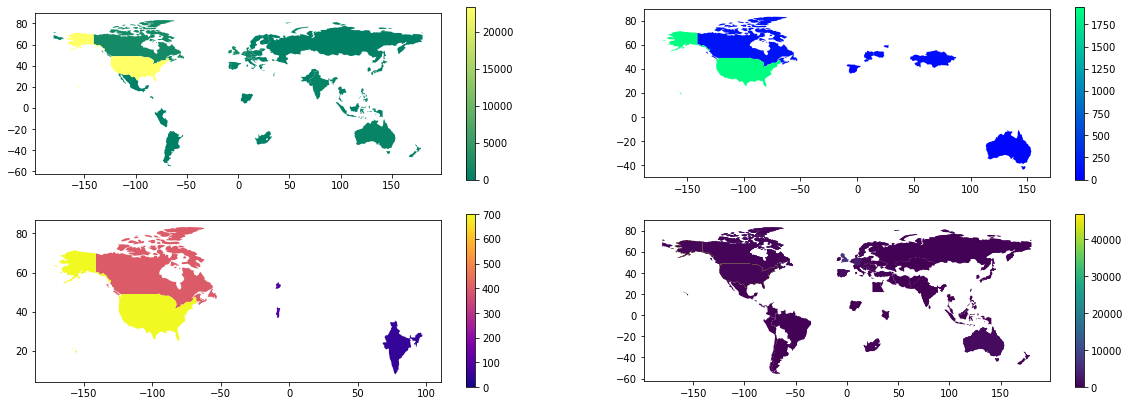

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot setup
fig, ax = plt.subplots(2, 2, figsize=[20, 7])

# Plot map
geo_2020 = geo.GeoDataFrame(dataset_remote_geo[dataset_remote_geo.work_year == '2020'])
geo_2020.plot(
    column="remote_ratio",
    ax=ax[0][0],
    legend=True,
    cmap="summer",
    vmin=0.,
)

geo_2021 = geo.GeoDataFrame(dataset_remote_geo[dataset_remote_geo.work_year == '2021'])
geo_2021.plot(
    column="remote_ratio",
    ax=ax[0][1],
    legend=True,
    cmap="winter",
    vmin=0.,
)

geo_2022 = geo.GeoDataFrame(dataset_remote_geo[dataset_remote_geo.work_year == '2022e'])
geo_2022.plot(
    column="remote_ratio",
    ax=ax[1][0],
    legend=True,
    cmap="plasma",
    vmin=0.,
)
geo_all = geo.GeoDataFrame(dataset_remote_geo)
geo_all.plot(
    column="remote_ratio",
    ax=ax[1][1],
    legend=True,
    cmap="viridis",
    vmin=0.,
)
# Plot settings
# ax.axis("off")
plt.show()